**Import Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Udemy Courses.csv')
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


**Prepare Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [ ]:
df.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182
std,3.436355e+05,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000
50%,6.885580e+05,911.500000,18.000000,25.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


**Data Cleaning**

**Check Missing Values**

**IF there is null values:**

1. df.dropna(inplace=True) to Remove All Rows with Null values (inplace to ensure it remove from original data).
2. df.fillna(df.mean(),inplace=True) to Replace Null values with Mean.
3. df.fillna(df.median(),inplace=True) to Replace Null values with median.

In [ ]:
df.isnull().sum()

,0
course_id,0
course_title,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0
published_timestamp,0


**Check duplicates**

IF there is duplicated rows:

* df.drop_duplicates(inplace=True) **to Remove All duplicated rows** (inplace to ensure it remove from original data).



In [ ]:
df.duplicated().sum()

np.int64(6)

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

**Drop the Courses that has no lectures as it doesn't make sense for the courses to not contain any lecture.**

In [ ]:
for x in df.index:
  if df.loc[x,"num_lectures"] == 0:
    df.drop(x,inplace=True)

**We have two unique and unneeded columns('course_id'&'url') so we will drop them.**

In [ ]:
df['course_id'].nunique()

3671

In [ ]:
df.drop(columns=['course_id'],inplace=True)

In [ ]:
df.shape

(3671, 10)

**Data Transformation**

* df['published_timestamp'] = pd.to_datetime(df['published_timestamp']) **to Change datatype published_timestamp From String to datetime.**
* df ['year'] = df['published_timestamp'].dt.year **to Create New Column to year only.**
* df ['month'] = df['published_timestamp'].dt.month **to Create New Column to month only.**
* df ['day'] = df['published_timestamp'].dt.day **to Create New Column to day only.**




In [ ]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df ['year'] = df['published_timestamp'].dt.year
df ['month'] = df['published_timestamp'].dt.month
df ['day'] = df['published_timestamp'].dt.day
df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,day
0,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9,18
1,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,2017,4,12
2,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments,2017,4,26
3,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments,2017,2,21
4,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments,2017,2,21


* df['content_duration'] = df['content_duration'].str.replace(' hours', '', regex=False) **to Remove hours from content_duration.**
* df['content_duration'] = df['content_duration'].str.replace(' hour', '', regex=False) **to Remove hour from content_duration.**
* df['content_duration'] = df['content_duration'].str.replace(' mins', '', regex=False) **to Remove mins from content_duration.**
* df['content_duration'] = df['content_duration'].astype(float) **to Change datatype content_duration From String to float.**


In [ ]:
df['content_duration'] = df['content_duration'].str.replace(' hours', '', regex=False)
df['content_duration'] = df['content_duration'].str.replace(' hour', '', regex=False)
df['content_duration'] = df['content_duration'].str.replace(' mins', '', regex=False)
df['content_duration'] = df['content_duration'].astype(float)
df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,day
0,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9,18
1,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1.0,2017-04-12 19:06:34+00:00,Musical Instruments,2017,4,12
2,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5,2017-04-26 18:34:57+00:00,Musical Instruments,2017,4,26
3,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1.0,2017-02-21 23:48:18+00:00,Musical Instruments,2017,2,21
4,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37.0,2017-02-21 23:44:49+00:00,Musical Instruments,2017,2,21


In [ ]:
df['course_title'] = (df['course_title']
    .str.strip()  # Remove leading/trailing whitespace
    .str.lower()  # Convert to lowercase
    .str.replace(r'#\d+', '', regex=True)  # Remove hashtags and numbers like #1, #10
    .str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation
    .str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with single space
)

# Optional: Capitalize first letter of each word
df['course_title'] = df['course_title'].str.title()
df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,day
0,Piano Hand Coordination Play 10Th Ballad In E...,True,35,3137,18,68,All Levels,1.5,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9,18
1,Hand Coordination Transfer Chord Ballad 9 C B...,True,75,1593,1,41,Intermediate Level,1.0,2017-04-12 19:06:34+00:00,Musical Instruments,2017,4,12
2,Hand Coordination Let Your Hands Dance With B...,True,75,482,1,47,Intermediate Level,1.5,2017-04-26 18:34:57+00:00,Musical Instruments,2017,4,26
3,Piano Hand Coordination Fun Piano Runs In 2 B...,True,75,850,3,43,Intermediate Level,1.0,2017-02-21 23:48:18+00:00,Musical Instruments,2017,2,21
4,Piano Hand Coordination Piano Runs In 2 Beats...,True,75,940,3,32,Intermediate Level,37.0,2017-02-21 23:44:49+00:00,Musical Instruments,2017,2,21


* df['price'] = pd.to_numeric(df['price'], errors='coerce')  **to Convert to Float and Set 'Free' to NaN**

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,day
0,Piano Hand Coordination Play 10Th Ballad In E...,True,35.0,3137,18,68,All Levels,1.5,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9,18
1,Hand Coordination Transfer Chord Ballad 9 C B...,True,75.0,1593,1,41,Intermediate Level,1.0,2017-04-12 19:06:34+00:00,Musical Instruments,2017,4,12
2,Hand Coordination Let Your Hands Dance With B...,True,75.0,482,1,47,Intermediate Level,1.5,2017-04-26 18:34:57+00:00,Musical Instruments,2017,4,26
3,Piano Hand Coordination Fun Piano Runs In 2 B...,True,75.0,850,3,43,Intermediate Level,1.0,2017-02-21 23:48:18+00:00,Musical Instruments,2017,2,21
4,Piano Hand Coordination Piano Runs In 2 Beats...,True,75.0,940,3,32,Intermediate Level,37.0,2017-02-21 23:44:49+00:00,Musical Instruments,2017,2,21


**EDA and Visualization**

**1- HeatMap: to illustrate the colleration between the features (numerical data).**

*   numerical_df = df.select_dtypes(include=[np.number] **OR** numerical_df = df.select_dtypes(exclude= np.object_) **to Get only numerical data Columns.**
*   List item



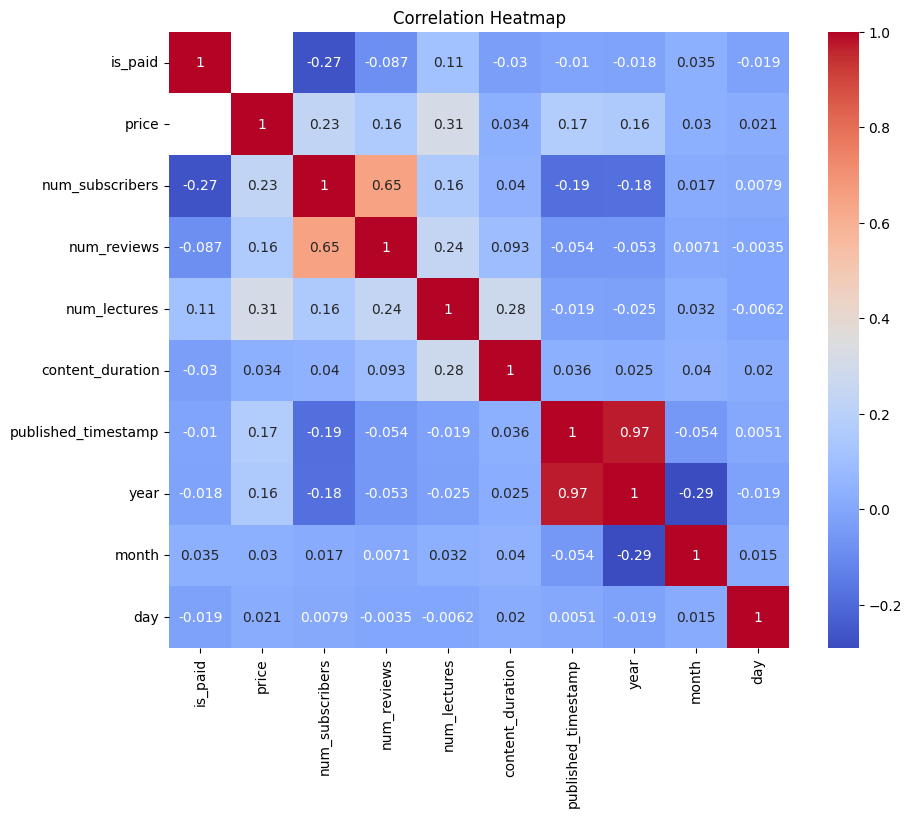

In [ ]:
# numerical_df = df.select_dtypes(include=[np.number])
numerical_df = df.select_dtypes(exclude= np.object_)

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**2- Number of paid and free Courses**

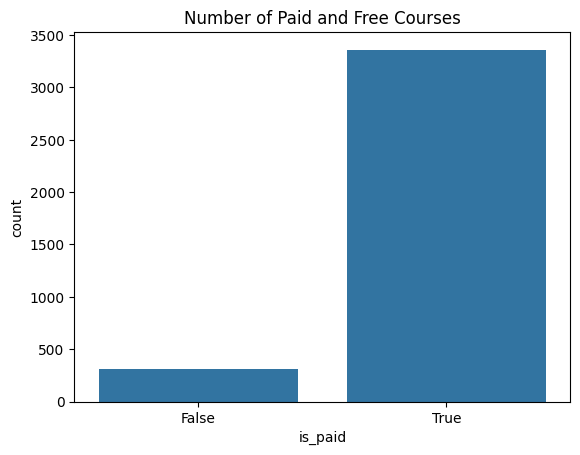

In [ ]:
sns.countplot(x='is_paid', data=df)
plt.title('Number of Paid and Free Courses')
plt.show()

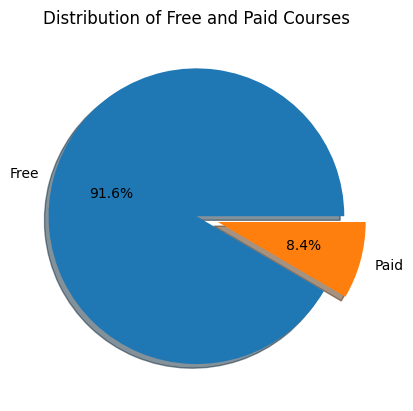

In [ ]:
plt.pie(df['is_paid'].value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%', shadow=True, explode=[0, 0.15])
plt.title('Distribution of Free and Paid Courses')
plt.show()

We can see that most of the courses are paid. But which one are on demand ?

**3- Relation between paid courses and number of subscribers.**

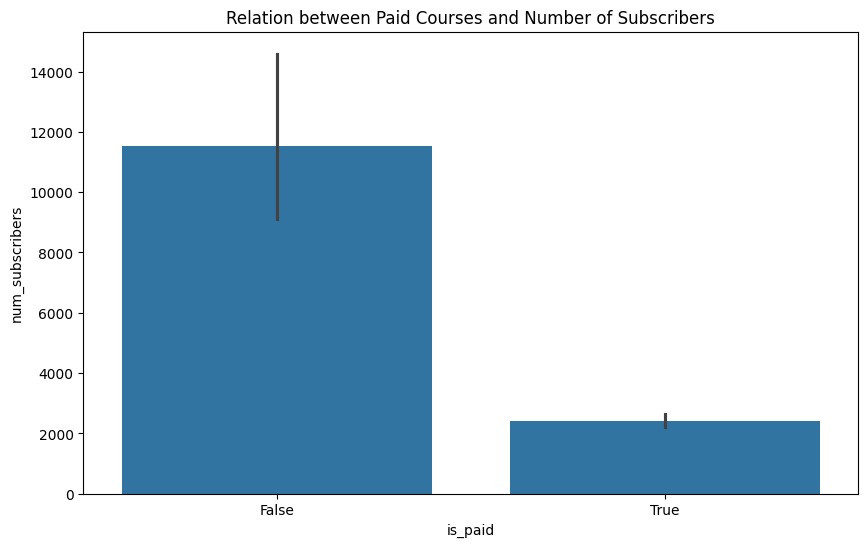

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='is_paid', y='num_subscribers', data=df)
plt.title('Relation between Paid Courses and Number of Subscribers')
plt.show()

Free courses are in demand more than paid courses.

**4- Number of Courses in each subject.**

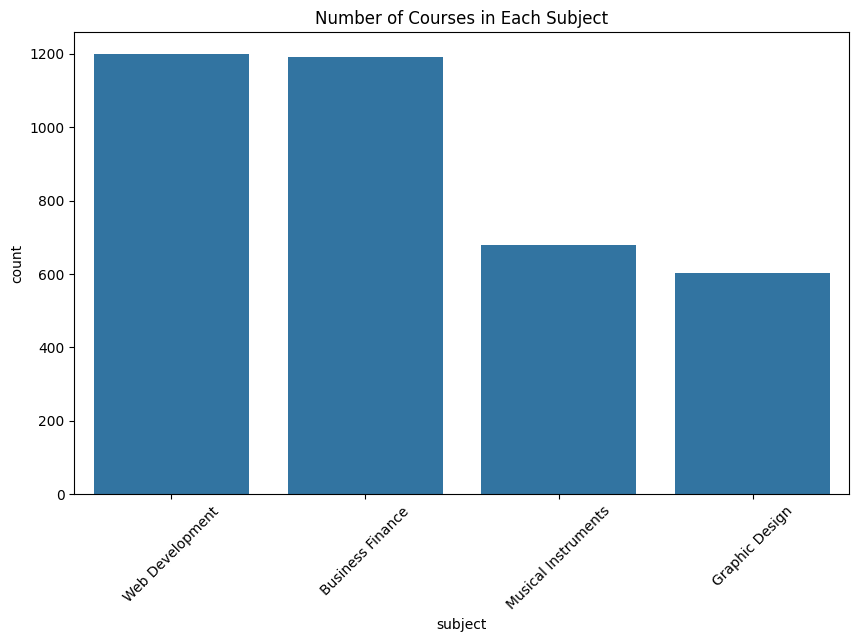

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='subject', data=df , order=df['subject'].value_counts().index)
plt.title('Number of Courses in Each Subject')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['subject'].value_counts()

,count
subject,
Web Development,1199
Business Finance,1190
Musical Instruments,680
Graphic Design,602


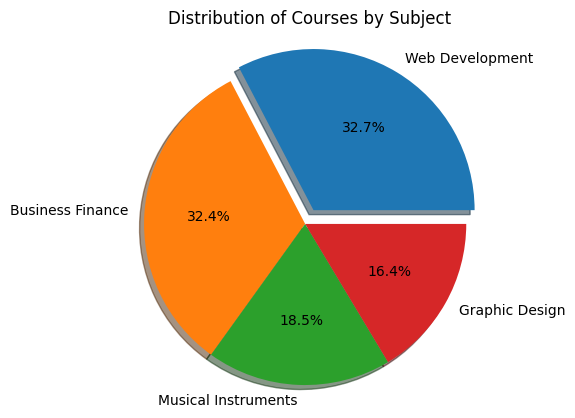

In [ ]:
plt.pie(df['subject'].value_counts(), labels=df['subject'].value_counts().index, autopct='%1.1f%%', shadow=True , explode=[0.1, 0, 0,0])
plt.title('Distribution of Courses by Subject')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Web Development and Business Finance have the bigger numder of courses and they are almost equal. butwhich subject is most popular to the subscribers?

**5- Which subject has the Max Number of Subscribers?**

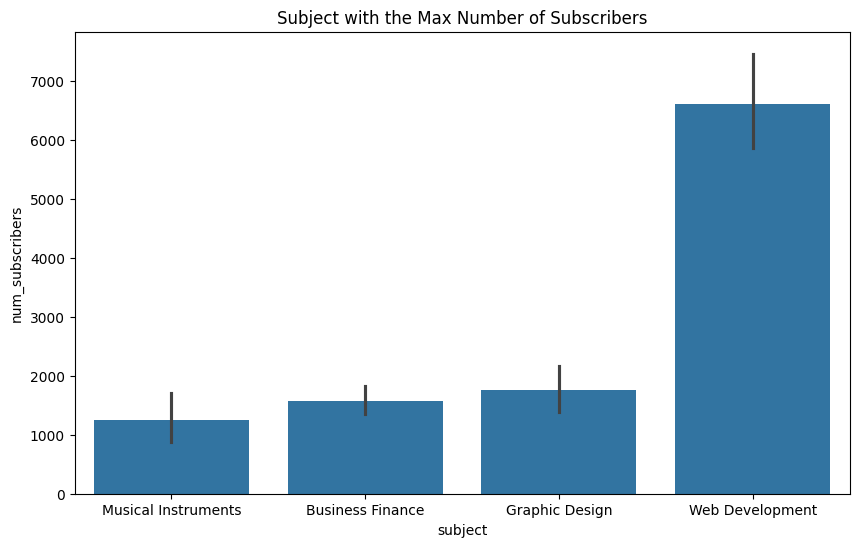

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='subject', y='num_subscribers', data=df)
plt.title('Subject with the Max Number of Subscribers')
plt.show()

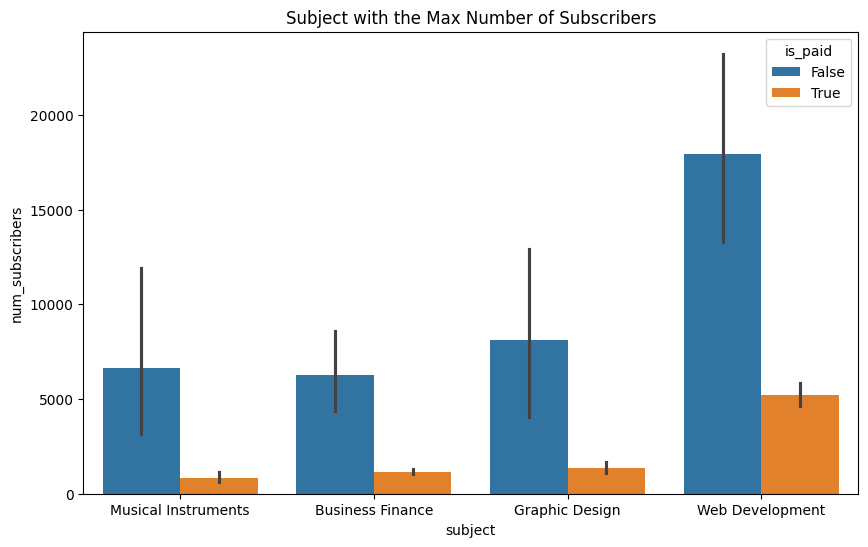

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='subject', y='num_subscribers', hue= 'is_paid', data=df)
plt.title('Subject with the Max Number of Subscribers')
plt.show()

It is obvious that web development and free courses are the most popular to the subscribers.

**6- Number of Courses in each level**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

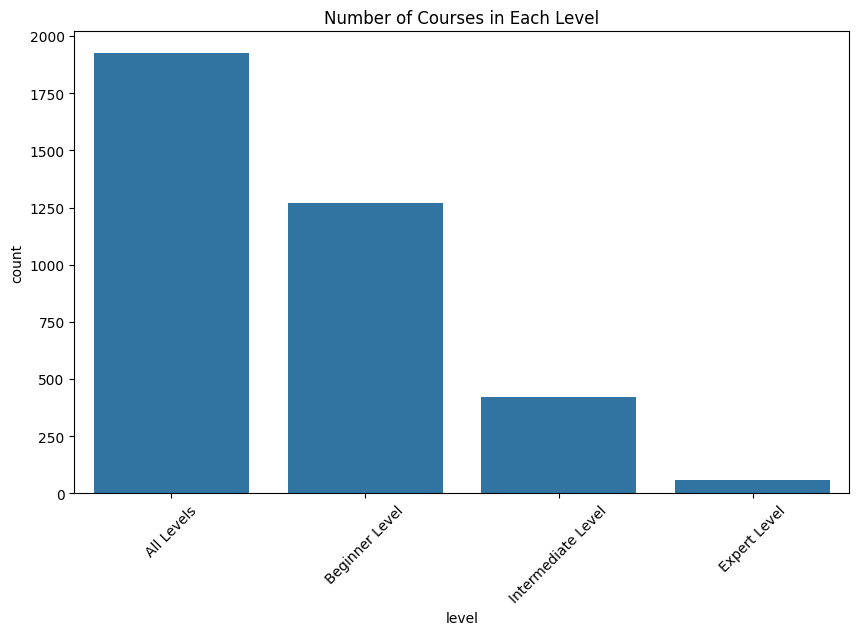

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='level', data=df , order=df['level'].value_counts().index)
plt.title('Number of Courses in Each Level')
plt.xticks(rotation=45)
plt

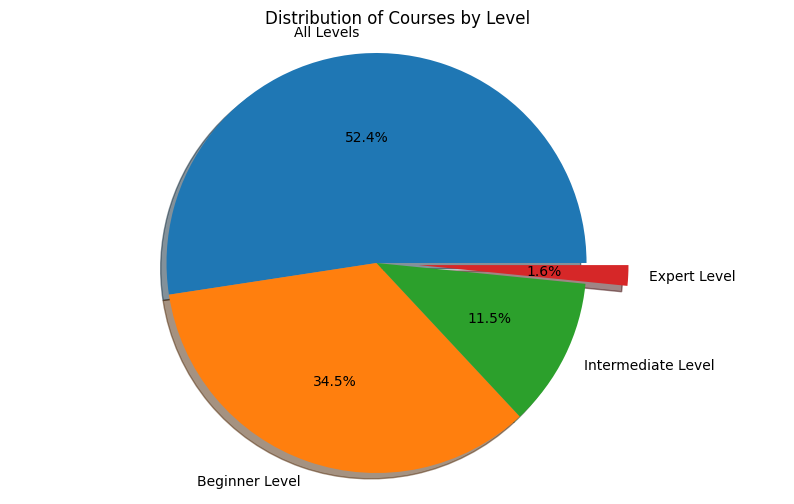

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(df['level'].value_counts(), labels=df['level'].value_counts().index, autopct='%1.1f%%', shadow=True , explode= [0, 0, 0,0.2])
plt.title('Distribution of Courses by Level')
plt.axis('equal')
plt.show()

We can conclude that bigger number of courses are in all levels and only few courses are in expert level.

**7- Distribution of Course prices**

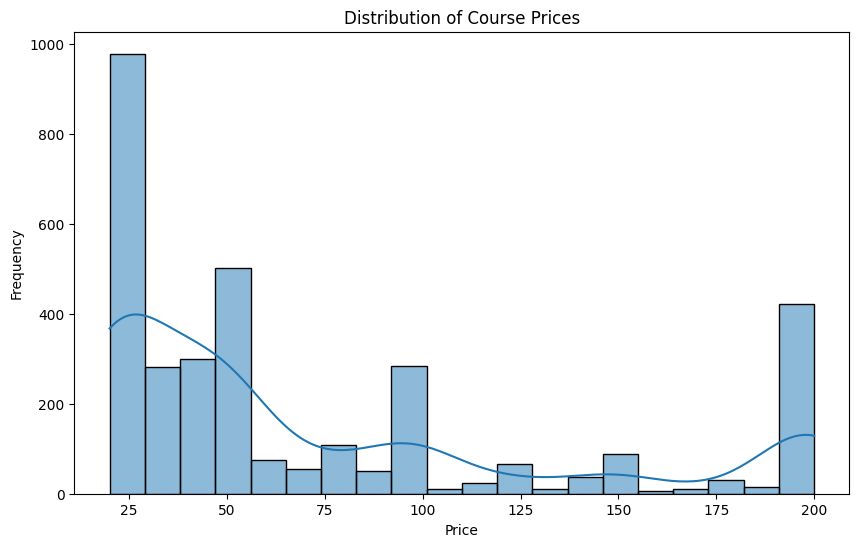

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Course Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**8- Relation between price and number of subscribers.**

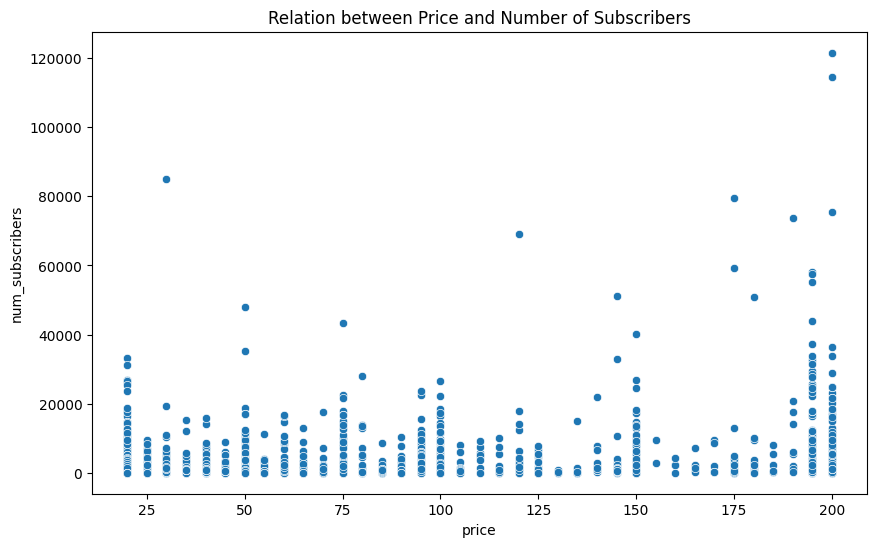

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='num_subscribers', data=df)
plt.title('Relation between Price and Number of Subscribers')
# plt.xlabel('Price')
# plt.ylabel('Number of Subscribers')
plt.show()

The most popular courses tend to be either free or very expensive.

**9- Which Course duration and number of lectures does subscribers prefer?**

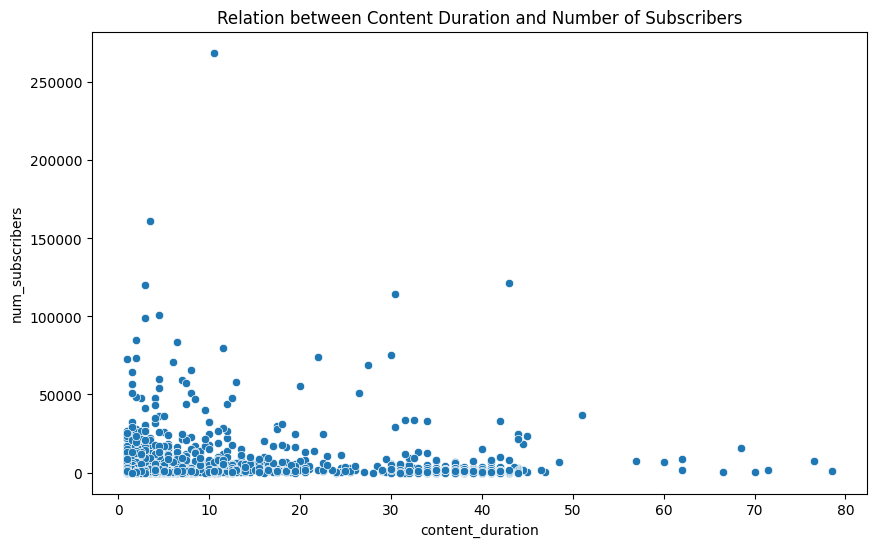

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='content_duration', y='num_subscribers', data=df)
plt.title('Relation between Content Duration and Number of Subscribers')
plt.show()

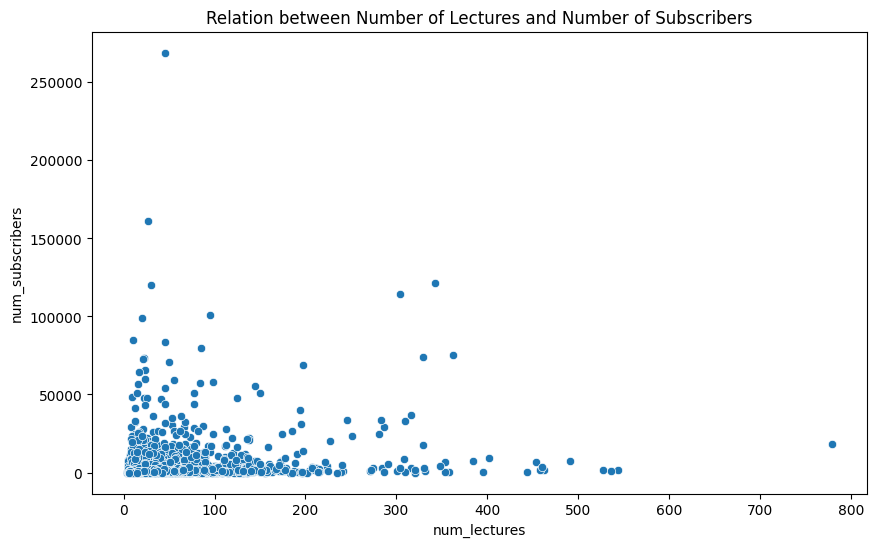

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_lectures', y='num_subscribers', data=df)
plt.title('Relation between Number of Lectures and Number of Subscribers')
plt.show()

**9- Which subject has the Max Number of Reviews?**

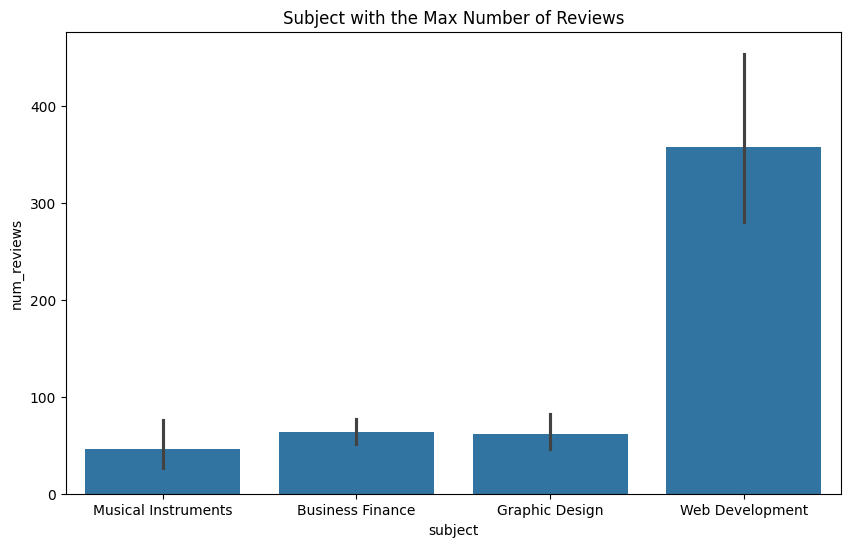

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='subject', y='num_reviews', data=df)
plt.title('Subject with the Max Number of Reviews')
plt.show()

**10- Total price of courses over the years**

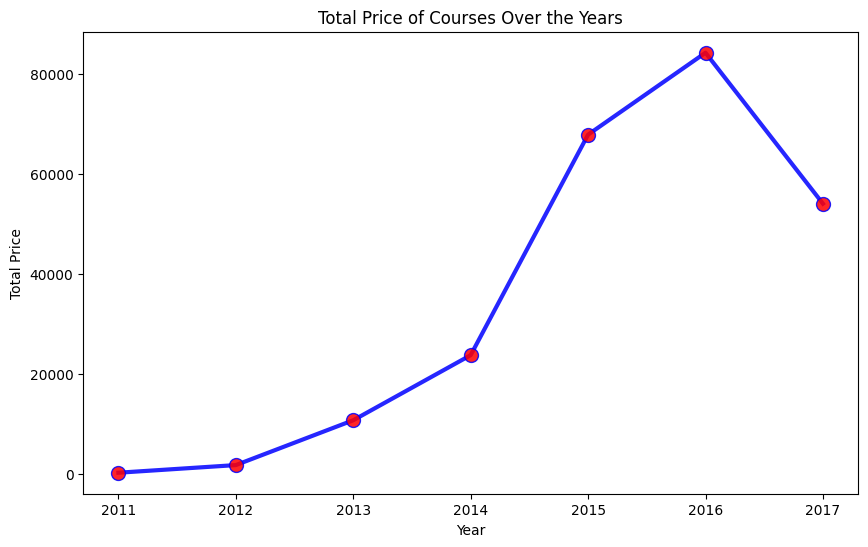

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.groupby('year')['price'].sum() , marker='o' , linestyle='-' , color='b' , linewidth=3 , markersize=10 , markerfacecolor='red', alpha=0.85)
plt.title('Total Price of Courses Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Price')
plt.show()

**11- Distribution of Courses Published Over Months**

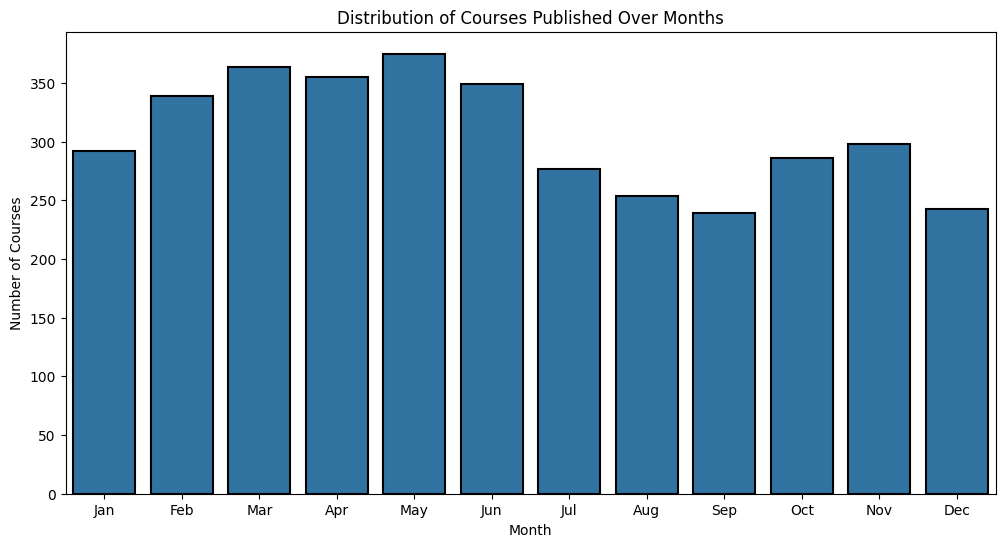

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df , edgecolor='black', linewidth=1.5)
plt.title('Distribution of Courses Published Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Courses')
plt.xticks(range(0, 12),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

12- What is the most 5 courses that have high subscribes?

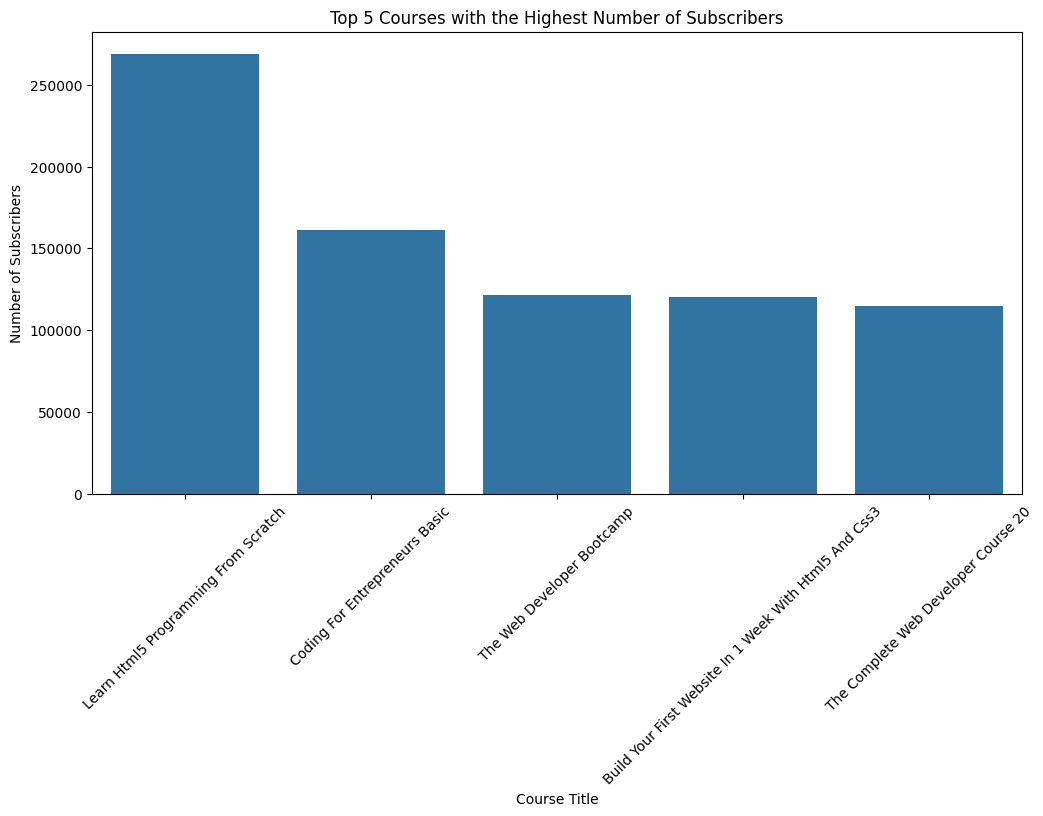

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y='num_subscribers', x='course_title', data=df.sort_values(by='num_subscribers', ascending=False).head(5))
plt.title('Top 5 Courses with the Highest Number of Subscribers')
plt.ylabel('Number of Subscribers')
plt.xlabel('Course Title')
plt.xticks(rotation=45)
plt.show()

**13- Most 5 courses that have high reviews**

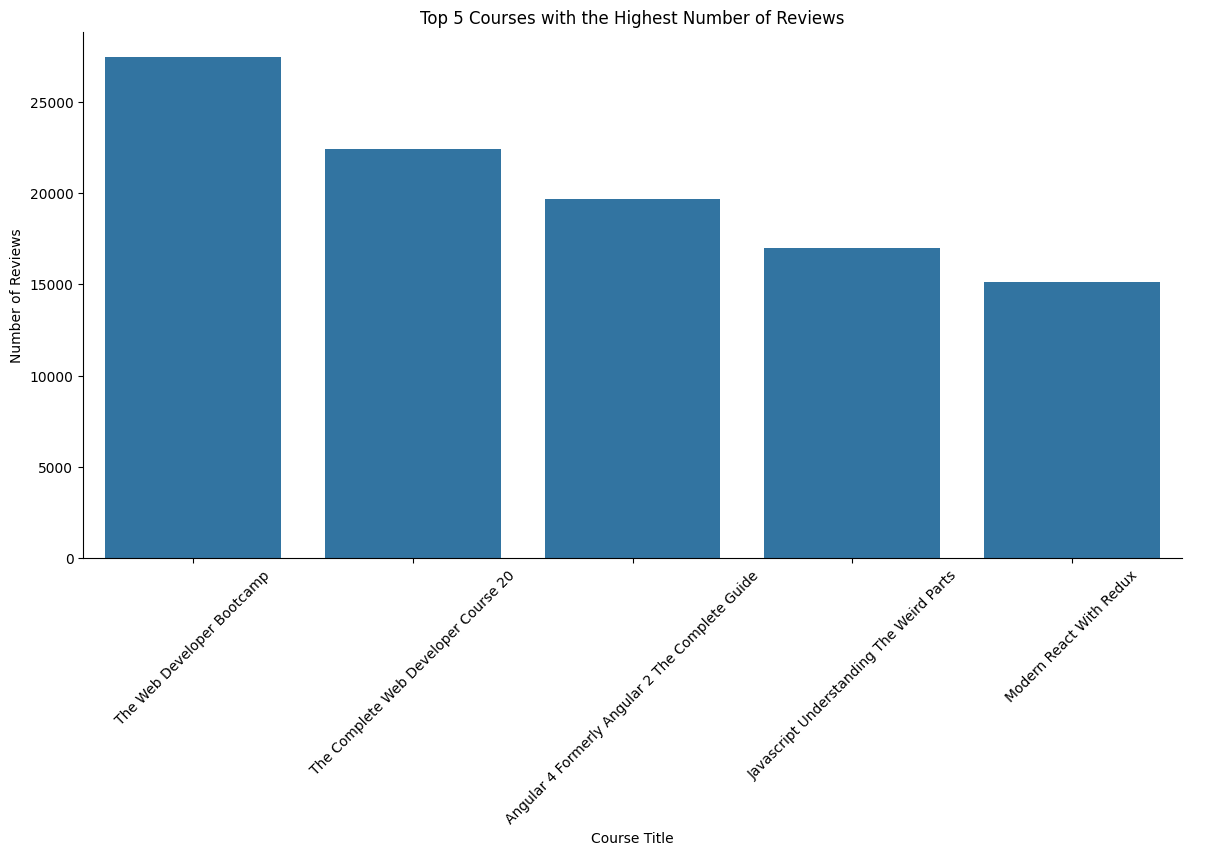

In [ ]:
sns.catplot(y='num_reviews', x='course_title', data=df.sort_values(by='num_reviews', ascending=False).head(5), kind='bar', height=6, aspect= 2)
plt.title('Top 5 Courses with the Highest Number of Reviews')
plt.ylabel('Number of Reviews')
plt.xlabel('Course Title')
x_ticks = plt.xticks(rotation=45)
plt.show()

**14- Top 20 courses that have price**

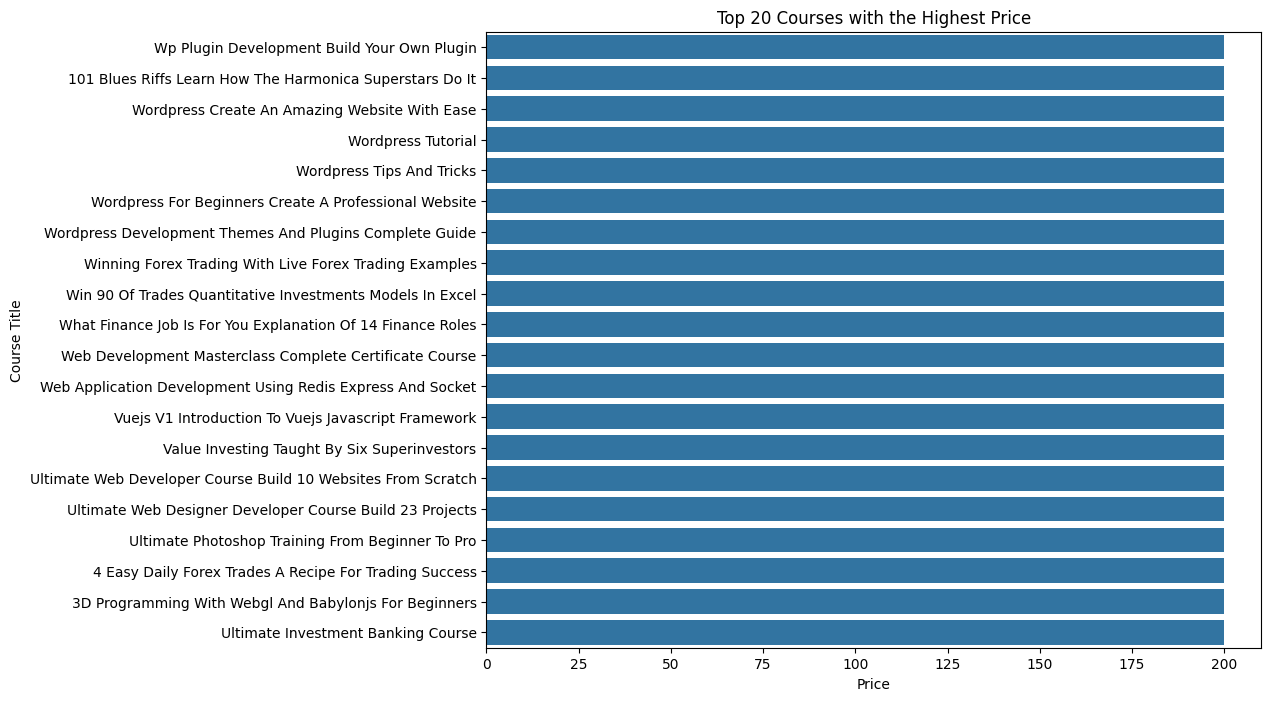

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='price', y='course_title', data=df.sort_values(by='price', ascending=False).head(20))
plt.title('Top 20 Courses with the Highest Price')
plt.xlabel('Price')
plt.ylabel('Course Title')
plt.show()

**15- Top 10 Courses that have high num_lectures**

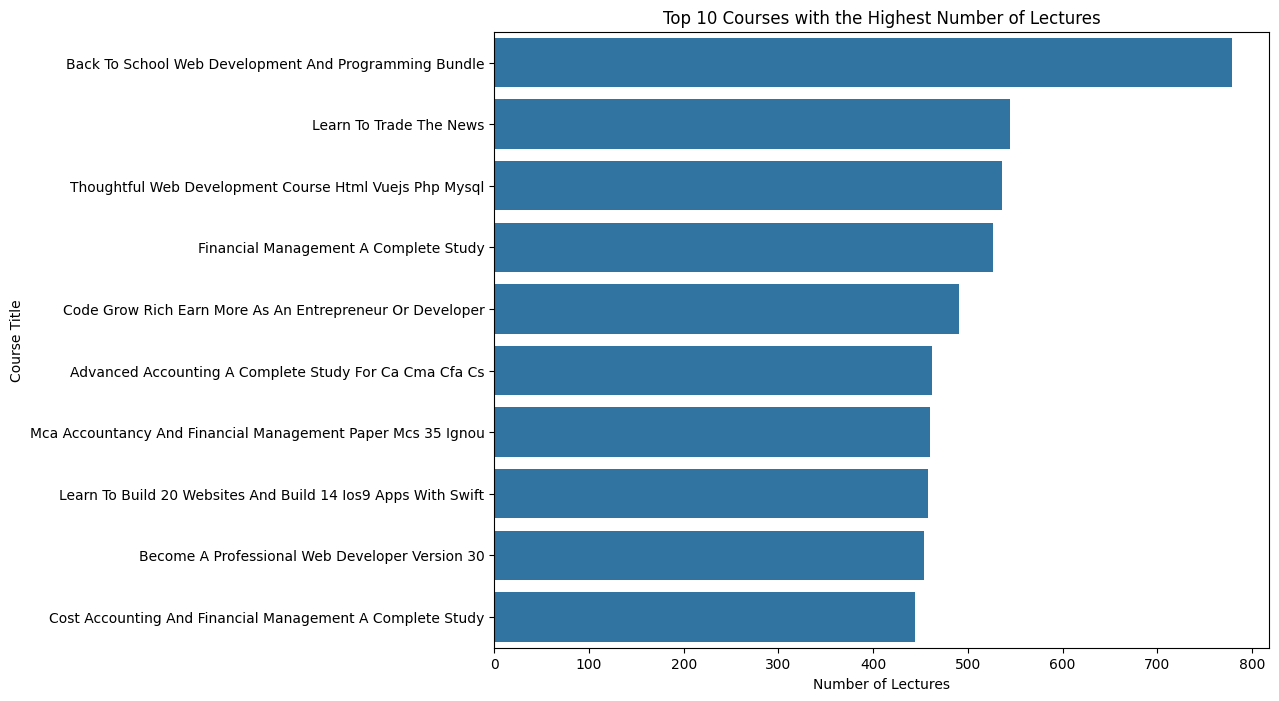

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='num_lectures', y='course_title', data=df.sort_values(by='num_lectures', ascending=False).head(10))
plt.title('Top 10 Courses with the Highest Number of Lectures')
plt.xlabel('Number of Lectures')
plt.ylabel('Course Title')
plt.show()
#

**16- Top 10 Courses that have longest duration**

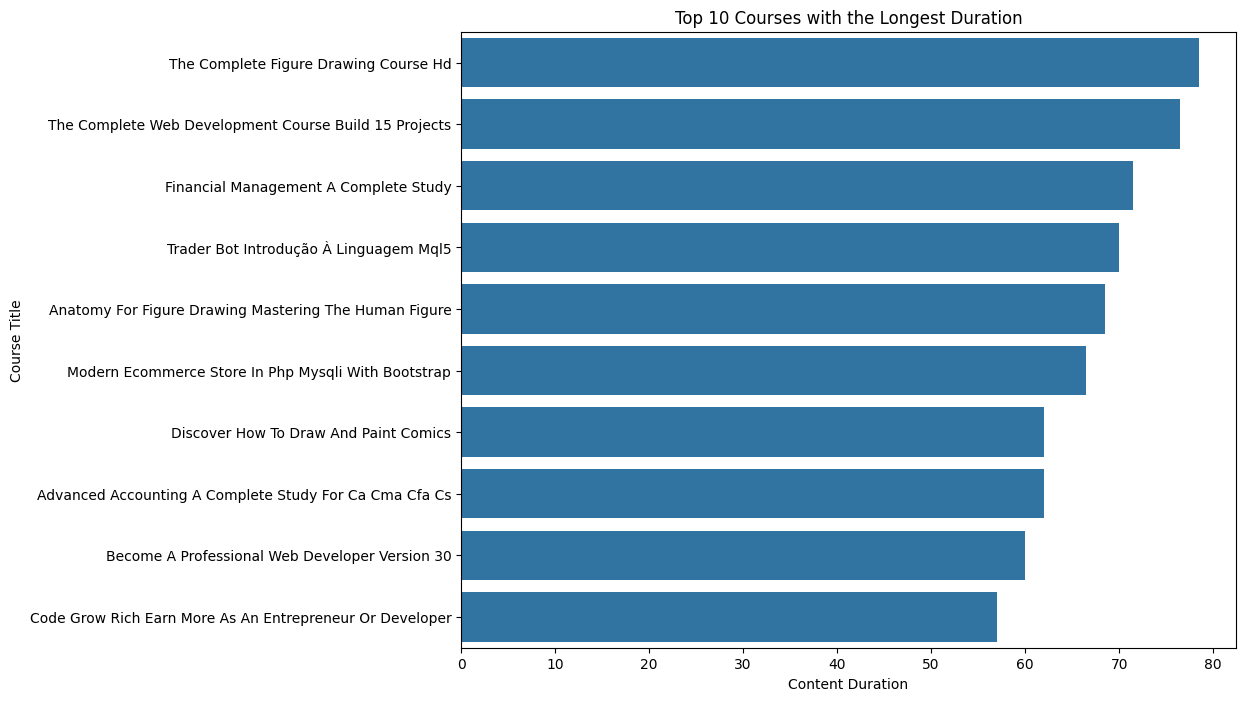

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='content_duration', y='course_title', data=df.sort_values(by='content_duration', ascending=False).head(10))
plt.title('Top 10 Courses with the Longest Duration')
plt.xlabel('Content Duration')
plt.ylabel('Course Title')
plt.show()